In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import *
from plotly import tools


In [2]:
df=pd.read_excel('/content/SalesData.xlsx',parse_dates=True, squeeze=True)
test=pd.read_excel('/content/predictionempty.xlsx',parse_dates=True, squeeze=True)

In [3]:
df.head()

,From,Sold Units,Retail_Sales (in USD),Industrial_Production
0,2013-01-01 00:00:00,3,450,101.70
1,2013-01-01 00:15:00,9,1350,101.96
2,2013-01-01 00:30:00,15,2250,101.20
3,2013-01-01 01:00:00,6,900,102.60
4,2013-01-01 01:15:00,6,900,101.44


In [4]:
test.head()

,Date,Sold_Units
0,2019-09-30,NaN
1,2019-10-01,NaN
2,2019-10-02,NaN
3,2019-10-03,NaN
4,2019-10-04,NaN


In [5]:
df['Date'] = pd.to_datetime(df['From']).dt.date

In [6]:
df.head()

,From,Sold Units,Retail_Sales (in USD),Industrial_Production,Date
0,2013-01-01 00:00:00,3,450,101.70,2013-01-01
1,2013-01-01 00:15:00,9,1350,101.96,2013-01-01
2,2013-01-01 00:30:00,15,2250,101.20,2013-01-01
3,2013-01-01 01:00:00,6,900,102.60,2013-01-01
4,2013-01-01 01:15:00,6,900,101.44,2013-01-01


In [7]:
#df.drop(['Export_Price_index', 'Import_Price_Index', 'Consumer_Price_Index', 'Employees', 'Industrial_Production', 'Material_Supply_Textile'], axis =1 , inplace=True)

In [8]:
df=df.groupby(['Date'])['Industrial_Production'].mean().reset_index()
df.head()

,Date,Industrial_Production
0,2013-01-01,102.324096
1,2013-01-02,102.332340
2,2013-01-03,102.263736
3,2013-01-04,102.243261
4,2013-01-05,102.340215


In [9]:
#Values = df['Sold Units']*150

In [10]:
#print(Values)

In [11]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Week'] = pd.to_datetime(df['Date']).dt.week
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['WeekDay'] = pd.to_datetime(df['Date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [12]:
test['Date'] = pd.to_datetime(test['Date']).dt.date
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['WeekDay'] = pd.to_datetime(test['Date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [13]:
df.head()

,Date,Industrial_Production,Year,Week,Day,WeekDay
0,2013-01-01,102.324096,2013,1,1,1
1,2013-01-02,102.332340,2013,1,2,2
2,2013-01-03,102.263736,2013,1,3,3
3,2013-01-04,102.243261,2013,1,4,4
4,2013-01-05,102.340215,2013,1,5,5


In [14]:
df.head()

,Date,Industrial_Production,Year,Week,Day,WeekDay
0,2013-01-01,102.324096,2013,1,1,1
1,2013-01-02,102.332340,2013,1,2,2
2,2013-01-03,102.263736,2013,1,3,3
3,2013-01-04,102.243261,2013,1,4,4
4,2013-01-05,102.340215,2013,1,5,5


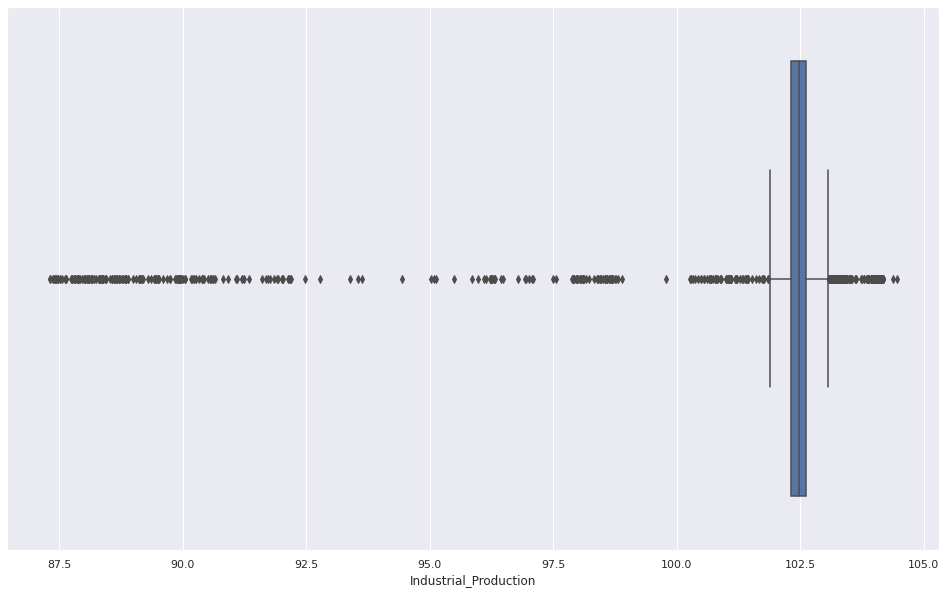

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16.7, 10)})
sns.boxplot(x = df['Industrial_Production'])

[array([102.31005093, 101.89248108]), array([102.60898539, 103.05736111])]

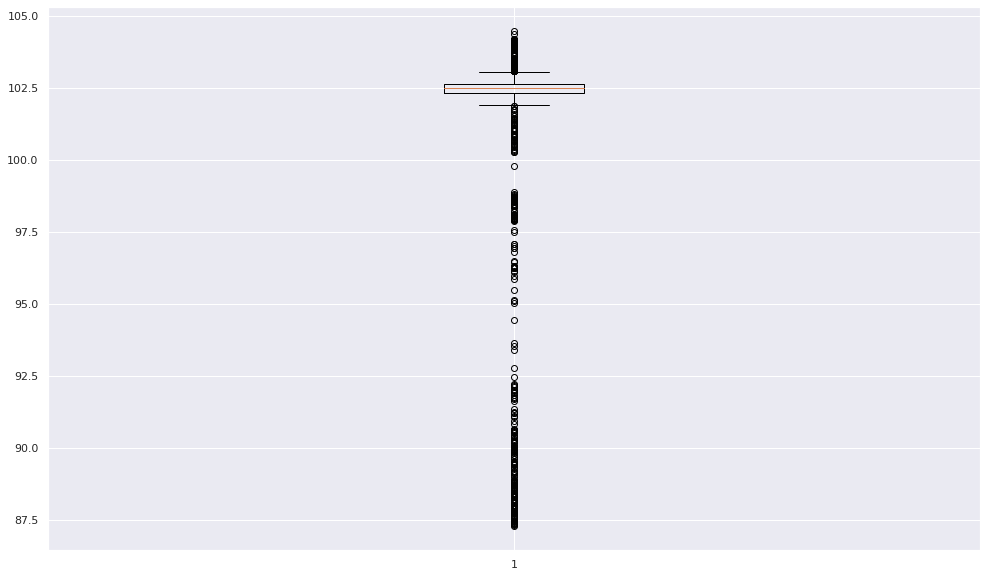

In [16]:
B=plt.boxplot(df['Industrial_Production'])
[item.get_ydata() for item in B['whiskers']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



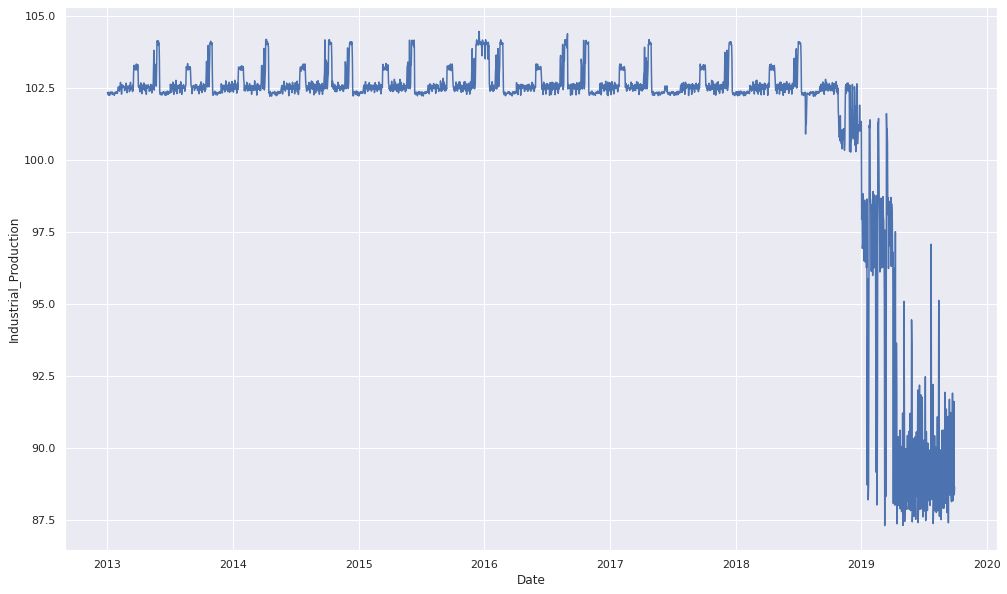

In [17]:
sns.lineplot(df['Date'], df['Industrial_Production'])

In [18]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=df['Date'], y=df['Industrial_Production'], name="Industrial_Production Per Day"),secondary_y=True)


figd.update_layout(title_text="Production Rate")

figd.update_xaxes(title_text="Date")

#figd.update_yaxes(title_text="Daily Recovered", secondary_y=False)
figd.update_yaxes(title_text="Production Rate", secondary_y=False)

'''figd = px.line(df, x=df['Date'], y=Values, title='Sold Units')
for ser in figd['data']:
    ser['text']=list(set([d.strftime('%Y-%m-%d') for d in df['Date']]))
    ser['hovertemplate']='Date=%{text}<br>Sales=%{y}<extra></extra>' '''

figd.show()

In [21]:
df["Date"] = pd.to_datetime(df["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [22]:
df.head()

,Date,Industrial_Production,Year,Week,Day,WeekDay
0,2013-01-01,102.324096,2013,1,1,1
1,2013-01-02,102.332340,2013,1,2,2
2,2013-01-03,102.263736,2013,1,3,3
3,2013-01-04,102.243261,2013,1,4,4
4,2013-01-05,102.340215,2013,1,5,5


In [23]:
df.tail()

,Date,Industrial_Production,Year,Week,Day,WeekDay
2458,2019-09-25,89.136695,2019,39,25,2
2459,2019-09-26,88.435944,2019,39,26,3
2460,2019-09-27,91.612173,2019,39,27,4
2461,2019-09-28,88.367579,2019,39,28,5
2462,2019-09-29,88.642864,2019,39,29,6


In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [25]:
from sklearn.model_selection import train_test_split
predictors=df.drop(['Industrial_Production', 'Date'],axis=1)
target=df['Industrial_Production']
x_train,x_test,y_train,y_test=train_test_split(predictors,target,test_size=0.2,random_state=7)

In [26]:
import numpy as np
import pandas as pd
import datetime as dt

def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred=lin.predict(x_test)
    lin_r= r2_score(y_test, y_pred)
    s.append(lin_r)
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor]
s=[]
for i in algos:
  scores(i)

In [27]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 
              'RandomForestRegressor', 'Lasso','DecisionTreeRegressor'],
    'Score': [s[0],s[1],s[2],s[3],s[4]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
2,RandomForestRegressor,0.918479
0,LinearRegression,0.293357
1,KNeighborsRegressor,0.277252
4,DecisionTreeRegressor,0.266036
3,Lasso,0.259563


In [28]:
#Hypertuned Model
model = RandomForestRegressor(oob_score = True,n_jobs =3,random_state =7,
                              max_features = "auto", min_samples_leaf =4)

In [29]:
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=3, oob_score=True,
                      random_state=7, verbose=0, warm_start=False)

In [30]:
pred = model.predict(x_test)

In [31]:
#R2 Score
r2_score(pred,y_test)

0.8890151800266622

In [32]:
import numpy as np

def mean_percentage_error(y_test, pred): 
    y_test, pred = np.array(y_test), np.array(pred)
    return np.mean(np.array((y_test - pred) / y_test)) * 100

In [33]:
mean_percentage_error(y_test, pred)


-0.144078053092693

In [34]:
df.head()


,Date,Industrial_Production,Year,Week,Day,WeekDay
0,2013-01-01,102.324096,2013,1,1,1
1,2013-01-02,102.332340,2013,1,2,2
2,2013-01-03,102.263736,2013,1,3,3
3,2013-01-04,102.243261,2013,1,4,4
4,2013-01-05,102.340215,2013,1,5,5


In [35]:
test1=test.drop(['Sold_Units', 'Date'],axis=1)


In [36]:
pred2 = model.predict(test1)

In [37]:
test['Sold_Units']=pred2.round(0)

In [38]:
test.head()


,Date,Sold_Units,Year,Week,Day,WeekDay
0,2019-09-30,89.0,2019,40,30,0
1,2019-10-01,89.0,2019,40,1,1
2,2019-10-02,90.0,2019,40,2,2
3,2019-10-03,90.0,2019,40,3,3
4,2019-10-04,90.0,2019,40,4,4


In [39]:
result=test[['Date','Sold_Units']]


In [40]:
result.head()

,Date,Sold_Units
0,2019-09-30,89.0
1,2019-10-01,89.0
2,2019-10-02,90.0
3,2019-10-03,90.0
4,2019-10-04,90.0


In [41]:
#result['Retail_Sales (in USD)'] = result['Sold_Units']* 150

In [42]:
result.head()

,Date,Sold_Units
0,2019-09-30,89.0
1,2019-10-01,89.0
2,2019-10-02,90.0
3,2019-10-03,90.0
4,2019-10-04,90.0


In [43]:
result.tail()

,Date,Sold_Units
666,2021-07-27,91.0
667,2021-07-28,90.0
668,2021-07-29,88.0
669,2021-07-30,89.0
670,2021-07-31,89.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



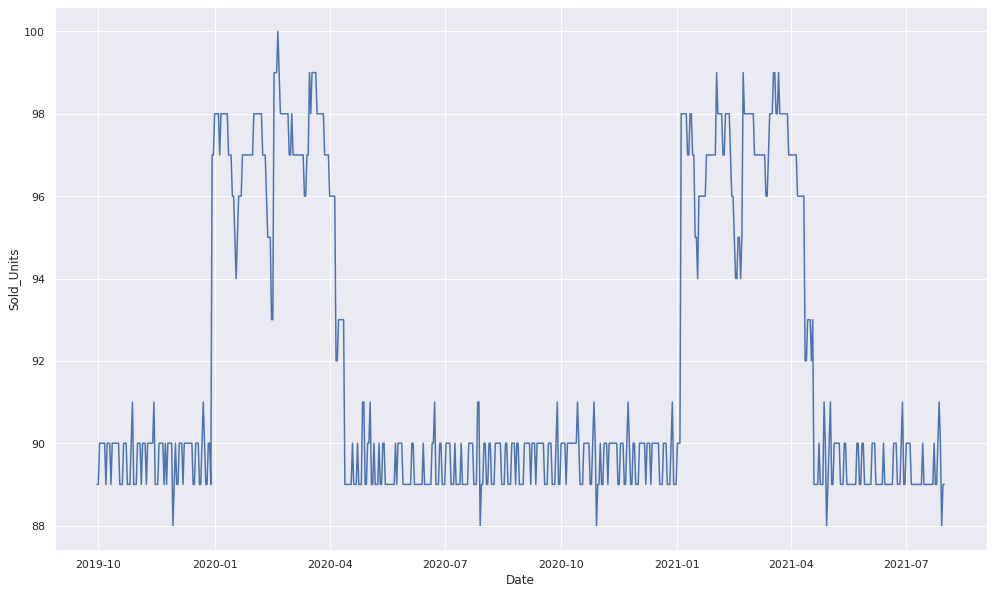

In [44]:
sns.lineplot(result['Date'], result['Sold_Units'])

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

figd = make_subplots(specs=[[{"secondary_y": True}]])

figd.add_trace(go.Scatter(x=result['Date'], y=result['Sold_Units'], name="Per Day Industrial Production Rate"),secondary_y=True)

figd.update_layout(title_text="Industrial Production Rate")

figd.update_xaxes(title_text="Date")

#figd.update_yaxes(title_text="Daily Recovered", secondary_y=False)
figd.update_yaxes(title_text="Sales", secondary_y=False)

'''fig1 = px.line(result, x=result['Date'], y=result['Retail_Sales (in USD)'], title='Sold Units')
for ser in fig1['data']:
    ser['text']=list(set([d.strftime('%Y-%m-%d') for d in result['Date']]))
    ser['hovertemplate']='Date=%{text}<br>Sales=%{y}<extra></extra>' '''

figd.show()

In [46]:
result.to_excel('IndustrialProd_finalresult.csv')